Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - loss: 0.3273 - val_loss: 0.3523
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.3048 - val_loss: 0.3204
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2610 - val_loss: 0.2886
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2597 - val_loss: 0.2565
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1835 - val_loss: 0.2250
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1668 - val_loss: 0.1941
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1258 - val_loss: 0.1643
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1232 - val_loss: 0.1357
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0920 - val_loss: 0.1092
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0731 - val_loss: 0.0851
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0540 - val_loss: 0.0641
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0294 - val_loss: 0.0470
Epoch 13/50

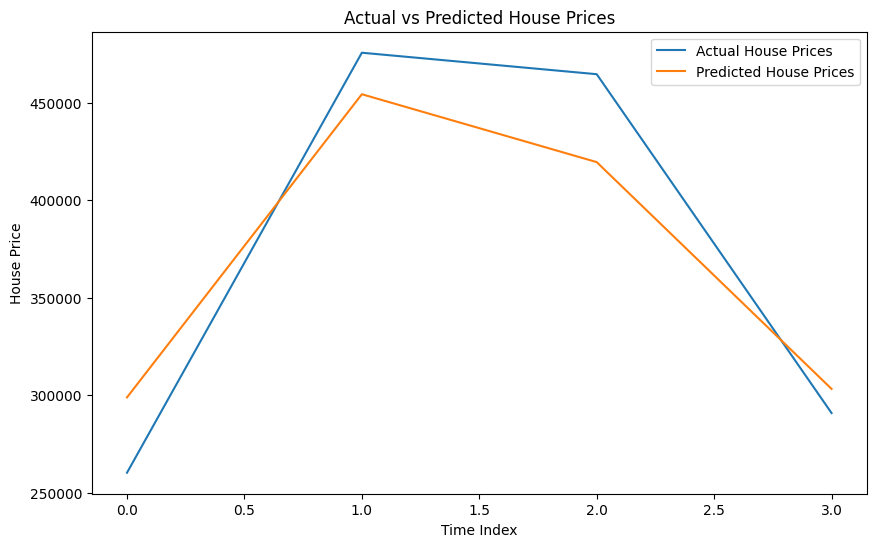

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generating synthetic data
def generate_synthetic_data():
    np.random.seed(42)
    years = np.arange(2000, 2025)
    house_prices = np.linspace(200000, 500000, len(years)) + np.random.normal(0, 10000, len(years))
    cpi = np.linspace(150, 300, len(years)) + np.random.normal(0, 5, len(years))
    inflation = np.random.uniform(1.5, 3.5, len(years))

    data = pd.DataFrame({
        'Year': years,
        'HousePrice': house_prices,
        'CPI': cpi,
        'Inflation': inflation
    })

    return data

data = generate_synthetic_data()

# Preparing data for LSTM
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['HousePrice', 'CPI', 'Inflation']])

def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length, :])
        y.append(data[i + sequence_length, 0])  # Predicting HousePrice
    return np.array(x), np.array(y)

sequence_length = 5
x, y = create_sequences(data_scaled, sequence_length)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LSTM model specification
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 3), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Training
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_test, y_test), verbose=1)

# Evaluation
test_loss = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred = model.predict(x_test)

# Inverse scale predictions and actual values
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 2))), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((len(y_pred), 2))), axis=1))[:, 0]

# Results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual House Prices')
plt.plot(y_pred_inv, label='Predicted House Prices')
plt.legend()
plt.xlabel('Time Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.show()
